# Import Modul

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

# EDA

# Read Data

In [2]:
df = pd.read_csv("students_adaptability_level_online_education.csv")

# Head and Tail Data

In [3]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [4]:
df.tail()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1204,Girl,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Moderate


# Bentuk Dataset

In [5]:
df.shape

(1205, 14)

# Cek Tipe Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


# Missing Value

In [7]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

# Visualisasi

<AxesSubplot:ylabel='Adaptivity Level'>

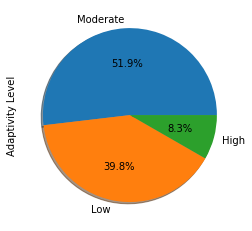

In [8]:
df['Adaptivity Level'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

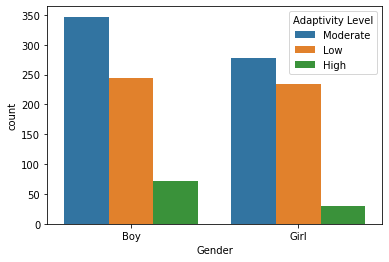

In [9]:
sns.countplot(x=df['Gender'],hue=df['Adaptivity Level'])

<AxesSubplot:xlabel='Age', ylabel='count'>

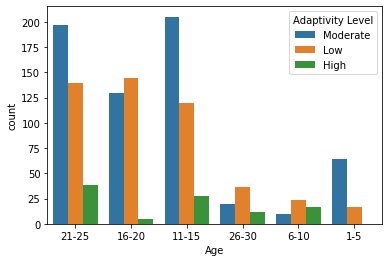

In [10]:
sns.countplot(x=df['Age'],hue=df['Adaptivity Level'])

<AxesSubplot:xlabel='Education Level', ylabel='count'>

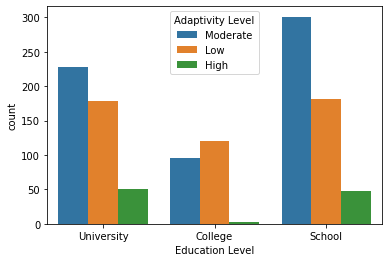

In [11]:
sns.countplot(x=df['Education Level'],hue=df['Adaptivity Level'])

<AxesSubplot:xlabel='Institution Type', ylabel='count'>

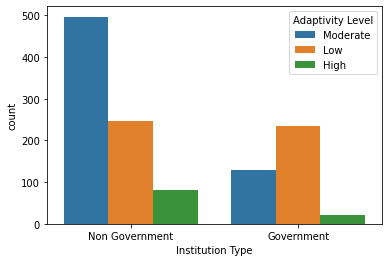

In [12]:
sns.countplot(x=df['Institution Type'],hue=df['Adaptivity Level'])

<AxesSubplot:xlabel='IT Student', ylabel='count'>

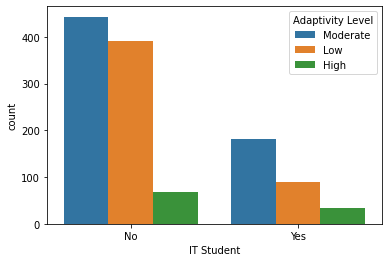

In [13]:
sns.countplot(x=df['IT Student'],hue=df['Adaptivity Level'])

<AxesSubplot:xlabel='Location', ylabel='count'>

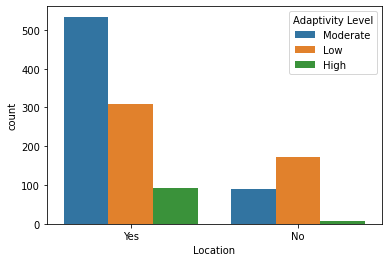

In [14]:
sns.countplot(x=df['Location'],hue=df['Adaptivity Level'])

<AxesSubplot:xlabel='Load-shedding', ylabel='count'>

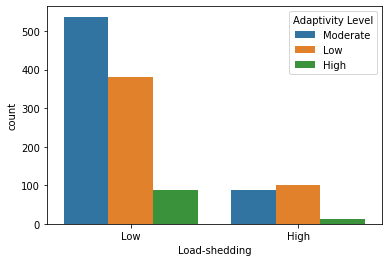

In [15]:
sns.countplot(x=df['Load-shedding'],hue=df['Adaptivity Level'])

<AxesSubplot:xlabel='Financial Condition', ylabel='count'>

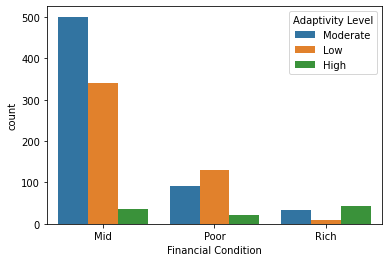

In [16]:
sns.countplot(x=df['Financial Condition'],hue=df['Adaptivity Level'])

<AxesSubplot:xlabel='Internet Type', ylabel='count'>

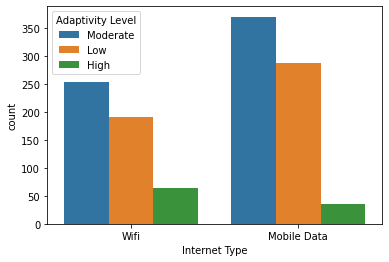

In [17]:
sns.countplot(x=df['Internet Type'],hue=df['Adaptivity Level'])

<AxesSubplot:xlabel='Network Type', ylabel='count'>

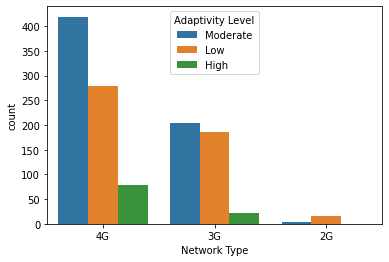

In [18]:
sns.countplot(x=df['Network Type'],hue=df['Adaptivity Level'])

<AxesSubplot:xlabel='Class Duration', ylabel='count'>

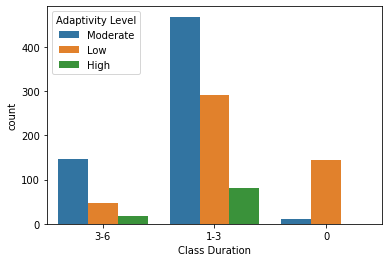

In [19]:
sns.countplot(x=df['Class Duration'],hue=df['Adaptivity Level'])

<AxesSubplot:xlabel='Self Lms', ylabel='count'>

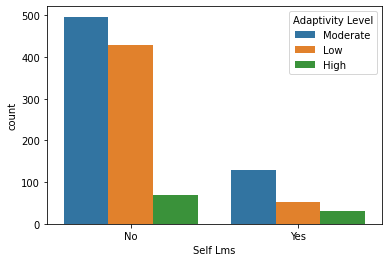

In [20]:
sns.countplot(x=df['Self Lms'],hue=df['Adaptivity Level'])

<AxesSubplot:xlabel='Device', ylabel='count'>

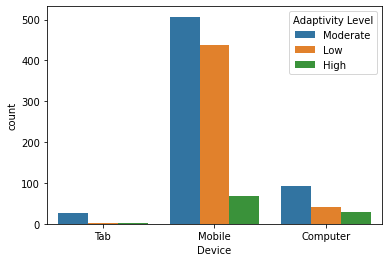

In [21]:
sns.countplot(x=df['Device'],hue=df['Adaptivity Level'])

# Deskripsi Dataframe

In [22]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


# Change Data Type

In [23]:
# change all data type using LabelEncode
data=df

label_encoders = {}
categorical_columns = data.columns  

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Lihat Perubahan Data

In [24]:
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1


# KORELASI

In [25]:
cols = df.corr()
cols

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
Gender,1.000000,-0.130395,-0.197743,0.106910,-0.233284,-0.034231,0.059998,-0.017410,-0.021589,-0.032527,-0.035407,-0.138331,0.140691,0.033426
Age,-0.130395,1.000000,0.414985,-0.216818,0.320066,-0.187269,-0.122011,0.028792,0.203195,-0.049077,0.065048,0.246289,-0.171172,-0.230317
Education Level,-0.197743,0.414985,1.000000,0.116403,0.415967,0.063676,0.004725,0.083509,0.080694,-0.046162,0.165127,0.326259,-0.278548,-0.032694
Institution Type,0.106910,-0.216818,0.116403,1.000000,0.104185,0.326813,-0.017794,0.013586,0.060198,-0.060035,0.348251,0.096722,-0.096857,0.162387
IT Student,-0.233284,0.320066,0.415967,0.104185,1.000000,0.009697,-0.186005,-0.025075,0.113452,-0.128817,0.228662,0.453429,-0.386776,0.049282
Location,-0.034231,-0.187269,0.063676,0.326813,0.009697,1.000000,0.245380,0.056958,0.222660,0.171539,0.216953,-0.036443,-0.070397,0.107414
Load-shedding,0.059998,-0.122011,0.004725,-0.017794,-0.186005,0.245380,1.000000,-0.001017,-0.013199,0.164678,-0.119729,-0.187610,0.052088,0.043611
Financial Condition,-0.017410,0.028792,0.083509,0.013586,-0.025075,0.056958,-0.001017,1.000000,-0.020469,-0.019926,0.023791,-0.064362,-0.020968,-0.274643
Internet Type,-0.021589,0.203195,0.080694,0.060198,0.113452,0.222660,-0.013199,-0.020469,1.000000,0.335989,0.250804,0.084661,-0.250007,-0.084276
Network Type,-0.032527,-0.049077,-0.046162,-0.060035,-0.128817,0.171539,0.164678,-0.019926,0.335989,1.000000,-0.019866,-0.207056,-0.063738,0.021647


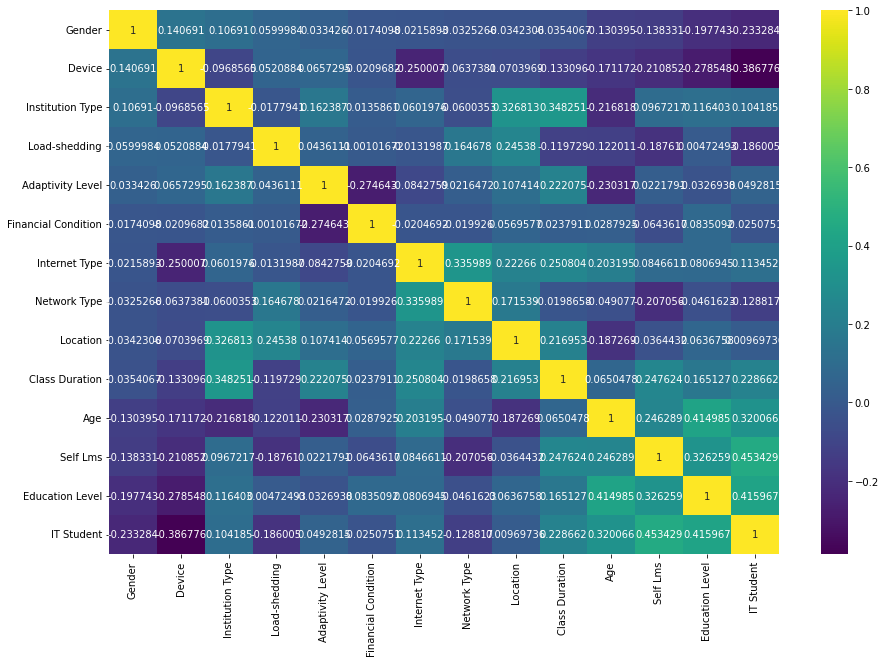

In [26]:
k = 14 #Jumlah variabel
cols = df.corr().nlargest(k, 'Gender')['Gender'].index
cm = df[cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')
plt.show()

# Train and Test Data

In [27]:
#Defined X value and y value , and split the data train
X = data.drop(columns="Adaptivity Level")           
y = data["Adaptivity Level"]    # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (903, 13)
X Test  :  (302, 13)
Y Train :  (903,)
Y Test  :  (302,)


# Decision Tree

In [28]:
DTC = DecisionTreeClassifier()

In [29]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
ypred = DTC.predict(X_test)
print(DTC,":",accuracy_score(y_test,ypred)*100)

DecisionTreeClassifier() : 89.40397350993378


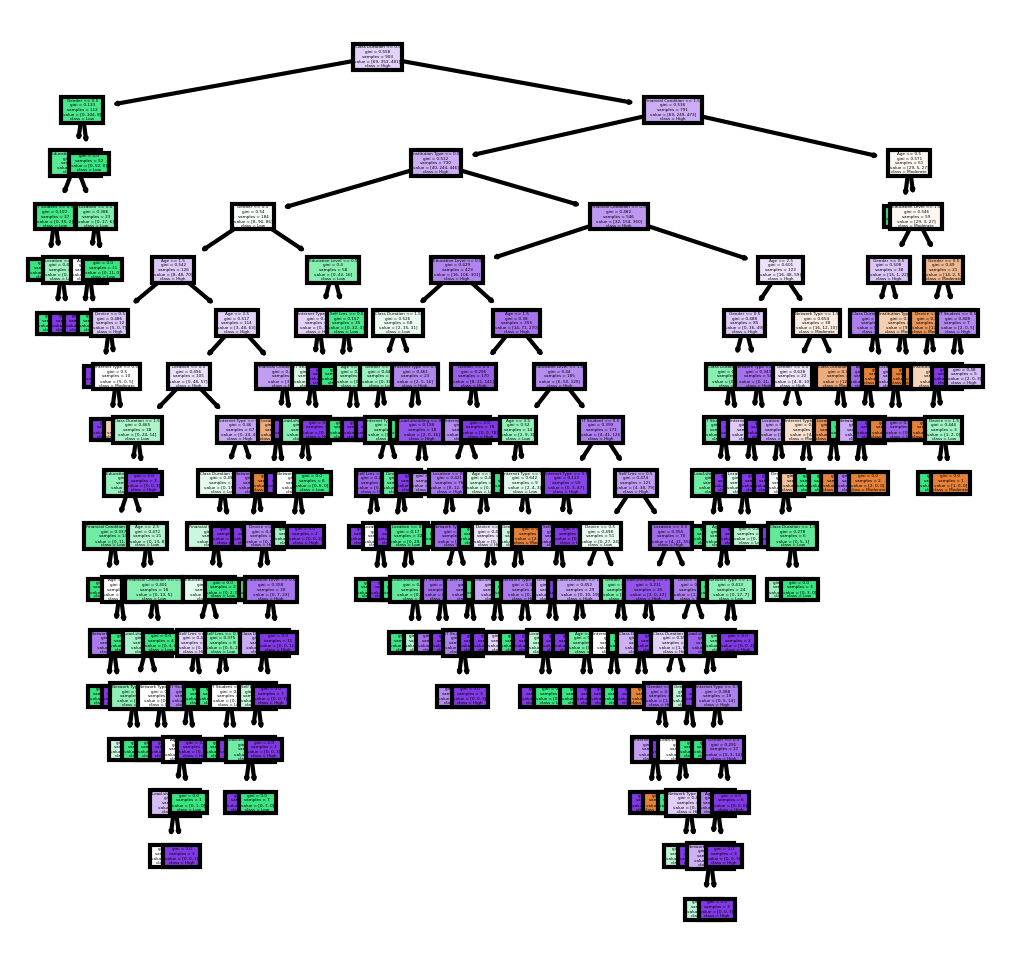

In [31]:
fn = ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device']
cn = ["Moderate","Low","High"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(DTC,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

# Grafik Akurasi

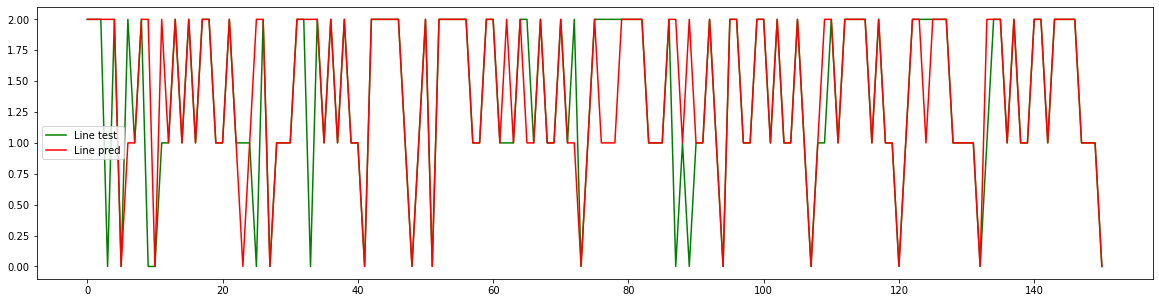

In [32]:
x = df.index[:151]

plt.figure(figsize=(20, 5))
plt.plot(x, y_test[:151], 'g', label='Line test')
plt.plot(x, ypred[:151], 'r', label='Line pred')

plt.legend()
plt.show()

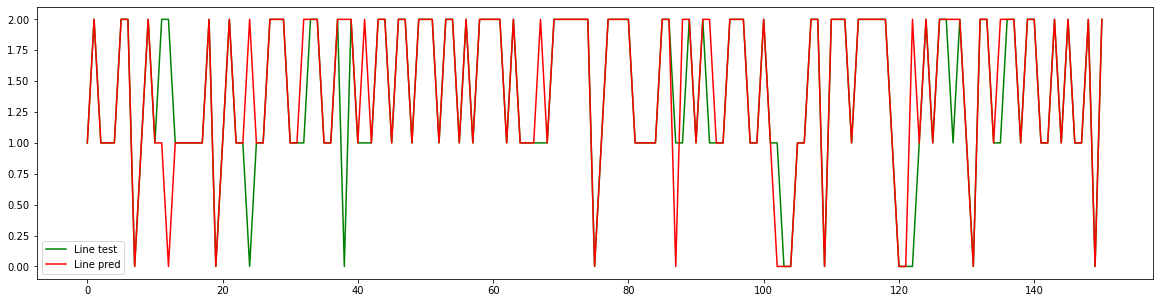

In [33]:
plt.figure(figsize=(20, 5))
plt.plot(x, y_test[151:], 'g', label='Line test')
plt.plot(x, ypred[151:], 'r', label='Line pred')

plt.legend()
plt.show()

# K-NN

In [34]:
KNN = KNeighborsClassifier(n_neighbors=3)

In [35]:
KNN.fit(X_train,y_train)
ypred = KNN.predict(X_test)
print(KNN,":",accuracy_score(y_test,ypred)*100)

KNeighborsClassifier(n_neighbors=3) : 82.11920529801324


# Grafik Akurasi

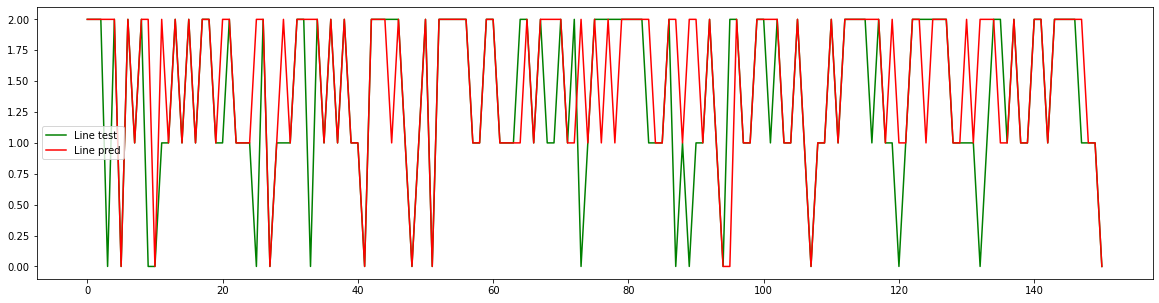

In [36]:
x = df.index[:151]

plt.figure(figsize=(20, 5))
plt.plot(x, y_test[:151], 'g', label='Line test')
plt.plot(x, ypred[:151], 'r', label='Line pred')

plt.legend()
plt.show()

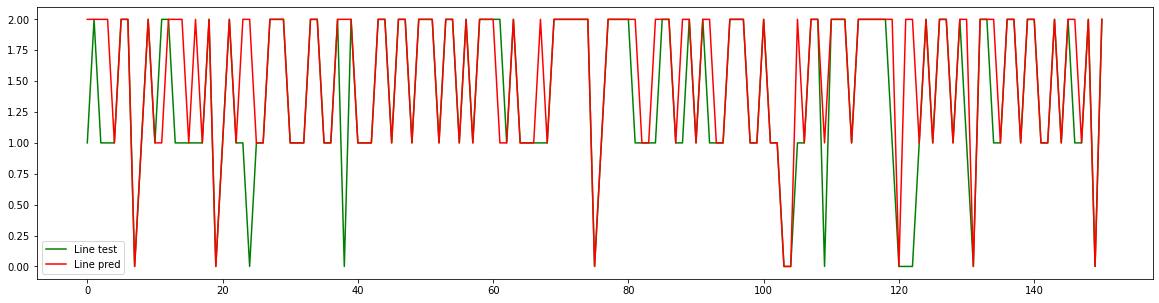

In [37]:
plt.figure(figsize=(20, 5))
plt.plot(x, y_test[151:], 'g', label='Line test')
plt.plot(x, ypred[151:], 'r', label='Line pred')

plt.legend()
plt.show()

# Naive Bayes

In [38]:
naive = GaussianNB()

In [39]:
naive.fit(X_train,y_train)
ypred = naive.predict(X_test)
print(naive,":",accuracy_score(y_test,ypred)*100)

GaussianNB() : 69.5364238410596


# Grafik Akurasi

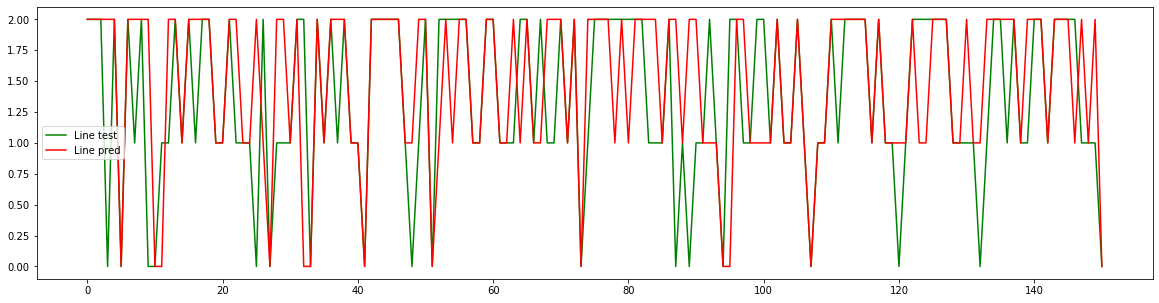

In [40]:
x = df.index[:151]

plt.figure(figsize=(20, 5))
plt.plot(x, y_test[:151], 'g', label='Line test')
plt.plot(x, ypred[:151], 'r', label='Line pred')

plt.legend()
plt.show()

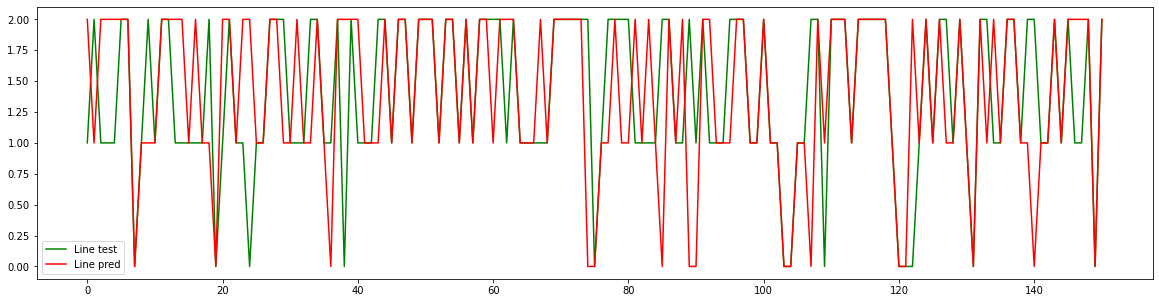

In [41]:
plt.figure(figsize=(20, 5))
plt.plot(x, y_test[151:], 'g', label='Line test')
plt.plot(x, ypred[151:], 'r', label='Line pred')

plt.legend()
plt.show()